In [1]:
!pip install tensorflow numpy matplotlib

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

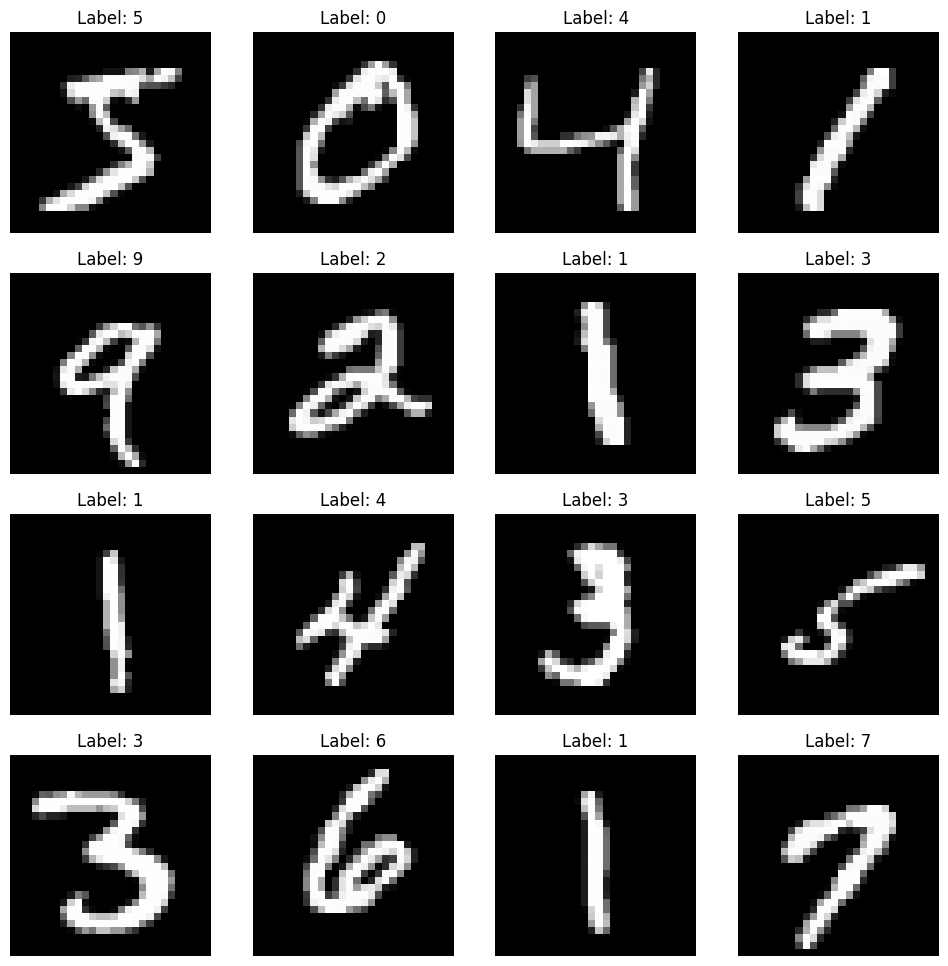

In [26]:
# Visualize the first few images from the dataset
def plot_images(images, labels, num_images):
    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        plt.subplot(4, 4, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()

plot_images(x_train, y_train, 16)

In [6]:
# Building the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into 1D vectors
    layers.Dense(128, activation='relu'),  # First dense layer with 128 neurons
    layers.Dropout(0.2),                   # Dropout for regularization
    layers.Dense(10, activation='softmax') # Output layer with 10 neurons (for digits 0-9)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9812 - loss: 0.0611 - val_accuracy: 0.9788 - val_loss: 0.0773
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9818 - loss: 0.0570 - val_accuracy: 0.9784 - val_loss: 0.0694
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9838 - loss: 0.0480 - val_accuracy: 0.9787 - val_loss: 0.0745
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9845 - loss: 0.0470 - val_accuracy: 0.9791 - val_loss: 0.0686
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9862 - loss: 0.0424 - val_accuracy: 0.9790 - val_loss: 0.0769
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9857 - loss: 0.0442 - val_accuracy: 0.9791 - val_loss: 0.0688
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9883 - loss: 0.0353 - val_accuracy: 0.9789 - val_loss: 0.0764
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9886 - loss: 0.03

In [27]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9738 - loss: 0.0947

Test accuracy: 0.9783999919891357


In [28]:
# Plot accuracy and loss over epochs
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

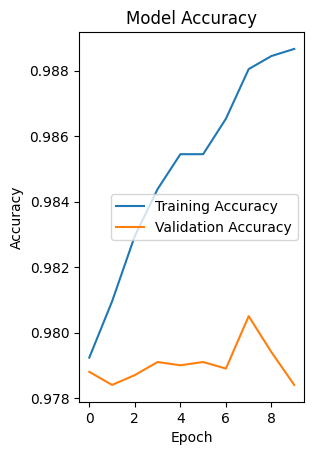

In [29]:
# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

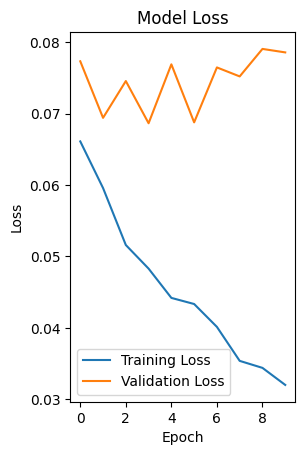

<Figure size 1200x400 with 0 Axes>

In [30]:
# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

plot_training_history(history)

In [31]:
# Predicting with the model
def predict_image(index):
    plt.imshow(x_test[index], cmap='gray')
    plt.title(f"Actual: {y_test[index]}")
    plt.show()

    prediction = model.predict(np.expand_dims(x_test[index], axis=0))
    predicted_label = np.argmax(prediction)
    print(f"Predicted Label: {predicted_label}")

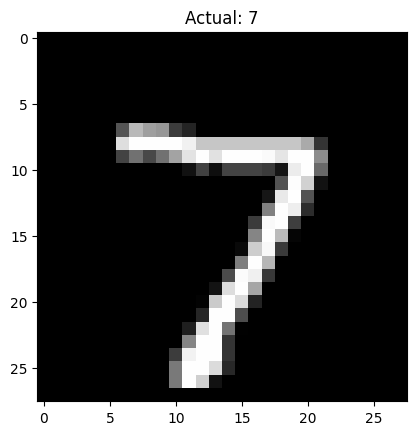

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Predicted Label: 7


In [32]:
# Predict a sample image
predict_image(0)